<a href="https://colab.research.google.com/github/DAEHO0/python/blob/main/230830_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [209]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive

In [210]:
df = pd.read_csv('/content/drive/MyDrive/Ashopping.csv', encoding = 'cp949')

In [211]:
df.head()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,149.136364
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,81.342105
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,1817.000000
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,403.111111
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,362.800000


In [212]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

### 회귀모형

In [213]:
from matplotlib import rc, font_manager
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [214]:
df['평균 구매주기']

0       149.136364
1        81.342105
2      1817.000000
3       403.111111
4       362.800000
          ...     
995     131.257143
996     770.666667
997     355.230769
998     138.535714
999     131.375000
Name: 평균 구매주기, Length: 1000, dtype: float64

In [215]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

<ipython-input-216-834bbca544a7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['평균 구매주기'])


<Axes: xlabel='평균 구매주기', ylabel='Density'>

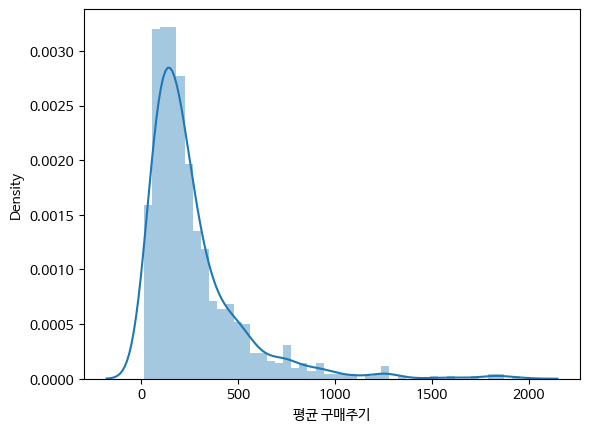

In [216]:
plt.rc('font', family = "NanumBarunGothic")
sns.distplot(df['평균 구매주기'])

<ipython-input-217-a9bb5c3edb4a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['평균 구매주기'])


<Axes: xlabel='평균 구매주기', ylabel='Density'>

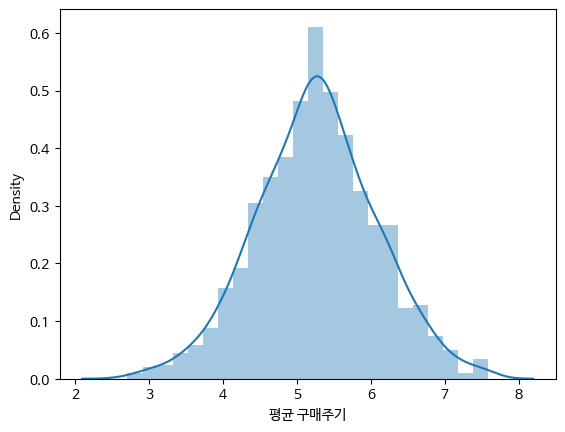

In [217]:
df['평균 구매주기'] = np.log1p(df['평균 구매주기'])
sns.distplot(df['평균 구매주기'])

In [218]:
# B0 + B1X1+ ...BnXn + E
# B의 왜도(비대칭) 가능성, x의 변화로 y의 값도 원활하게 변화하기 위해 설정

In [219]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [220]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [221]:
num = ['총매출액', '1회 평균매출액', '할인권 사용 횟수', '총 할인 금액']
cg = ['구매금액대', '고객등급']

In [222]:
X = df[df['이탈여부'] == 0][num + cg]
# 이탈여부가 0인 7개의 변수만 추출

In [223]:
X.head()

,총매출액,1회 평균매출액,할인권 사용 횟수,총 할인 금액,구매금액대,고객등급
300,4817810,267656,30,380000,1,1
301,2329590,129422,10,305145,0,1
302,3530500,294208,26,366595,0,2
303,20500350,280827,27,357145,2,2
304,9328620,227527,29,374050,2,2


In [224]:
X

,총매출액,1회 평균매출액,할인권 사용 횟수,총 할인 금액,구매금액대,고객등급
300,4817810,267656,30,380000,1,1
301,2329590,129422,10,305145,0,1
302,3530500,294208,26,366595,0,2
303,20500350,280827,27,357145,2,2
304,9328620,227527,29,374050,2,2
...,...,...,...,...,...,...
995,12731560,363759,3,44445,2,2
996,3419010,569835,6,186545,0,1
997,4612100,354777,8,260700,1,2
998,5165360,184477,20,347700,1,1


In [225]:
Y = df[df['이탈여부'] == 0]['평균 구매주기']

In [226]:
Y.head()

300    4.706523
301    4.977500
302    5.793014
303    3.987715
304    4.523643
Name: 평균 구매주기, dtype: float64

In [227]:
Y

300    4.706523
301    4.977500
302    5.793014
303    3.987715
304    4.523643
         ...   
995    4.884748
996    6.648553
997    5.875579
998    4.938321
999    4.885639
Name: 평균 구매주기, Length: 700, dtype: float64

In [228]:
X.corr()

,총매출액,1회 평균매출액,할인권 사용 횟수,총 할인 금액,구매금액대,고객등급
총매출액,1.000000,0.384479,0.030876,0.016205,0.664404,0.406895
1회 평균매출액,0.384479,1.000000,0.039768,0.043186,0.372449,0.244133
할인권 사용 횟수,0.030876,0.039768,1.000000,0.851112,0.006481,-0.035865
총 할인 금액,0.016205,0.043186,0.851112,1.000000,0.012578,-0.017106
구매금액대,0.664404,0.372449,0.006481,0.012578,1.000000,0.673577
고객등급,0.406895,0.244133,-0.035865,-0.017106,0.673577,1.000000


In [229]:
# 데이터 분할

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

         총매출액  1회 평균매출액  할인권 사용 횟수  총 할인 금액  구매금액대  고객등급
306   3763020    163610         22   350995      0     1
775   2684970     70657          1     6900      0     1
371   4758980    206912          5   131595      1     2
817  13541940    131475          5   150235      2     2
708  28033570    572114         10   304895      2     2
..        ...       ...        ...      ...    ...   ...
659   2925260     57358         15   325600      0     2
492   3678160    282935         19   366100      0     1
929   4483200    166044         17   365645      1     1
859  17322270    721761         24   359250      2     2
984   3868900    214939         19   365350      0     2

[490 rows x 6 columns]
         총매출액  1회 평균매출액  할인권 사용 횟수  총 할인 금액  구매금액대  고객등급
606   3096770    309677          1     5195      0     1
904   2345400    137965         24   359500      0     1
340   2827940    157108          9   247545      0     1
793  10197480   1274685          6   185850      2     2
314   3

In [230]:
# 표준화(scaling), 원핫인코딩 : 컬럼트랜스포머
# 원핫인코딩 : 범주형 데이터를 수치형 데이터로 변환

ct = ColumnTransformer([('scaling', StandardScaler(), num), ('onehot', OneHotEncoder(), cg)])
# ct = ColumnTransformer([('scaling', StandardScaler(), num), ('onehot', OneHotEncoder(sparse = False), cg)])
ct
# ColumnsTransformer([(), ()])

ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                 ['총매출액', '1회 평균매출액', '할인권 사용 횟수', '총 할인 금액']),
                                ('onehot', OneHotEncoder(), ['구매금액대', '고객등급'])])

In [231]:
ct.fit(X_train)

ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                 ['총매출액', '1회 평균매출액', '할인권 사용 횟수', '총 할인 금액']),
                                ('onehot', OneHotEncoder(), ['구매금액대', '고객등급'])])

In [232]:
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [233]:
print(X_train)
print(X_test)

[[-0.42215576 -0.59782402  0.72324173 ...  0.          1.
   0.        ]
 [-0.6083987  -1.00741459 -1.79440286 ...  0.          1.
   0.        ]
 [-0.2500946  -0.40701694 -1.31485151 ...  0.          0.
   1.        ]
 ...
 [-0.29773811 -0.58709878  0.12380254 ...  0.          1.
   0.        ]
 [ 1.92032808  1.86162735  0.96301741 ...  1.          0.
   1.        ]
 [-0.40386402 -0.37164656  0.36357822 ...  0.          0.
   1.        ]]
[[-0.53725651  0.04580948 -1.79440286 ...  0.          1.
   0.        ]
 [-0.66706251 -0.71082683  0.96301741 ...  0.          1.
   0.        ]
 [-0.58369934 -0.62647461 -0.83530016 ...  0.          1.
   0.        ]
 ...
 [-0.57329751 -0.25822514 -0.83530016 ...  0.          1.
   0.        ]
 [-0.01653812  0.36419142  0.48346606 ...  0.          0.
   1.        ]
 [-0.61557684 -0.78930529  0.96301741 ...  0.          0.
   1.        ]]


In [234]:
X_train_df = pd.DataFrame(X_train)

In [235]:
X_train_df

,0,1,2,3,4,5,6,7,8
0,-0.422156,-0.597824,0.723242,0.521504,1.0,0.0,0.0,1.0,0.0
1,-0.608399,-1.007415,-1.794403,-2.500897,1.0,0.0,0.0,1.0,0.0
2,-0.250095,-0.407017,-1.314852,-1.405623,0.0,1.0,0.0,0.0,1.0
3,1.267242,-0.739425,-1.314852,-1.241896,0.0,0.0,1.0,0.0,1.0
4,3.770803,1.202219,-0.715412,0.116579,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
485,-0.566886,-1.066016,-0.115973,0.298444,1.0,0.0,0.0,0.0,1.0
486,-0.436816,-0.072027,0.363578,0.654181,1.0,0.0,0.0,1.0,0.0
487,-0.297738,-0.587099,0.123803,0.650184,0.0,1.0,0.0,1.0,0.0
488,1.920328,1.861627,0.963017,0.594013,0.0,0.0,1.0,0.0,1.0


### 선형회귀

In [236]:
from sklearn.linear_model import LinearRegression

In [237]:
lr = LinearRegression()

In [238]:
lr.fit(X_train, Y_train)

LinearRegression()

In [239]:
Y_pred_lr = lr.predict(X_test)
print(Y_pred_lr)

[5.67724828 5.290772   5.30457105 6.70932415 5.15759467 5.62097119
 4.71571081 4.16992534 5.26941665 5.31982799 5.45416812 3.27791962
 4.31866139 5.27737229 5.83098565 4.83583284 5.0756363  5.36516248
 5.3569604  4.91720626 5.51040867 5.19192268 5.43432689 4.90388856
 5.06863663 5.28069125 5.4422347  4.23096888 4.61801955 5.2531166
 5.03545073 5.49840181 4.93421425 5.6801317  5.3188167  5.33111507
 5.30700624 5.33769978 5.29657621 6.92341985 5.25808876 4.48546582
 4.70818788 4.83206171 4.73473248 5.68064785 5.09419447 5.31093649
 5.08838422 5.55101106 5.27800688 6.0541917  5.03000183 4.6651573
 5.00437122 5.34368811 5.52149652 5.58126876 4.58948114 4.84205311
 5.03517048 4.73542562 4.6754122  5.42886291 4.72373981 5.23172333
 5.30745499 4.73877361 5.8511384  3.92589176 5.41026824 4.90796489
 5.21339628 5.19456862 4.19779617 5.82729244 5.50358362 5.40947065
 4.35579125 5.42254378 4.78152186 5.24995008 5.19072099 4.30189181
 5.39957056 5.01426162 4.92772111 5.25942769 4.36272246 5.338045

In [240]:
lr.intercept_

5.080075981820578

In [241]:
lr.coef_

array([-0.26622155,  0.50967024,  0.0196168 , -0.02875573,  0.35333489,
       -0.01258517, -0.34074972,  0.04031509, -0.04031509])

In [242]:
X.columns

Index(['총매출액', '1회 평균매출액', '할인권 사용 횟수', '총 할인 금액', '구매금액대', '고객등급'], dtype='object')

In [243]:
X_train_df.columns

RangeIndex(start=0, stop=9, step=1)

In [244]:
X_train_df
# 0 <- -2.662, 1 <- 5.0967, 2 <- 1.9616
# Y햇 = 5.08(B0) + -0.27(B1) * 총매출(X1) + 0.51(B2) * 1회 평균 매출액(X2) + 0.02(B3) * 할인궈 사용 횟수(X3) +
# (-0.29) * 총 할인 금액(B3) + 0.35(B4) * 구매금액대 ...

,0,1,2,3,4,5,6,7,8
0,-0.422156,-0.597824,0.723242,0.521504,1.0,0.0,0.0,1.0,0.0
1,-0.608399,-1.007415,-1.794403,-2.500897,1.0,0.0,0.0,1.0,0.0
2,-0.250095,-0.407017,-1.314852,-1.405623,0.0,1.0,0.0,0.0,1.0
3,1.267242,-0.739425,-1.314852,-1.241896,0.0,0.0,1.0,0.0,1.0
4,3.770803,1.202219,-0.715412,0.116579,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
485,-0.566886,-1.066016,-0.115973,0.298444,1.0,0.0,0.0,0.0,1.0
486,-0.436816,-0.072027,0.363578,0.654181,1.0,0.0,0.0,1.0,0.0
487,-0.297738,-0.587099,0.123803,0.650184,0.0,1.0,0.0,1.0,0.0
488,1.920328,1.861627,0.963017,0.594013,0.0,0.0,1.0,0.0,1.0


In [245]:
X.describe()

,총매출액,1회 평균매출액,할인권 사용 횟수,총 할인 금액,구매금액대,고객등급
count,7.000000e+02,7.000000e+02,700.000000,700.000000,700.000000,700.000000
mean,6.299243e+06,2.996386e+05,15.985714,292117.564286,0.774286,1.548571
std,6.301904e+06,2.377558e+05,8.291356,112657.654889,0.791891,0.497991
min,1.912540e+06,2.708200e+04,1.000000,3750.000000,0.000000,1.000000
25%,2.997495e+06,1.577660e+05,9.000000,261846.250000,0.000000,1.000000
50%,4.403415e+06,2.372125e+05,17.000000,347645.000000,1.000000,2.000000
75%,6.822915e+06,3.645740e+05,23.000000,365400.000000,1.000000,2.000000
max,6.759576e+07,2.672915e+06,30.000000,398735.000000,2.000000,2.000000


In [246]:
Y_pred_lr

array([5.67724828, 5.290772  , 5.30457105, 6.70932415, 5.15759467,
       5.62097119, 4.71571081, 4.16992534, 5.26941665, 5.31982799,
       5.45416812, 3.27791962, 4.31866139, 5.27737229, 5.83098565,
       4.83583284, 5.0756363 , 5.36516248, 5.3569604 , 4.91720626,
       5.51040867, 5.19192268, 5.43432689, 4.90388856, 5.06863663,
       5.28069125, 5.4422347 , 4.23096888, 4.61801955, 5.2531166 ,
       5.03545073, 5.49840181, 4.93421425, 5.6801317 , 5.3188167 ,
       5.33111507, 5.30700624, 5.33769978, 5.29657621, 6.92341985,
       5.25808876, 4.48546582, 4.70818788, 4.83206171, 4.73473248,
       5.68064785, 5.09419447, 5.31093649, 5.08838422, 5.55101106,
       5.27800688, 6.0541917 , 5.03000183, 4.6651573 , 5.00437122,
       5.34368811, 5.52149652, 5.58126876, 4.58948114, 4.84205311,
       5.03517048, 4.73542562, 4.6754122 , 5.42886291, 4.72373981,
       5.23172333, 5.30745499, 4.73877361, 5.8511384 , 3.92589176,
       5.41026824, 4.90796489, 5.21339628, 5.19456862, 4.19779

In [247]:
print('R2 :', lr.score(X_train, Y_train))

R2 : 0.5926325521678615


In [248]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_pred_lr, Y_test)
print("mse :", mse)

mse : 0.18236492775169827


In [249]:
from math import sqrt
rmse = sqrt(mse)
print("rmse :", rmse)

rmse : 0.4270420678946025


In [250]:
cor_lr = pd.DataFrame(Y_pred_lr, Y_test)
cor_lr.corr()

,0
0,1.0


### 릿지, 라쏘, 엘라스틱

In [251]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [252]:
rg = Ridge(alpha = 0.5)
ls = Lasso(alpha = 0.1)
en = ElasticNet(alpha = 0.5)

In [253]:
rg.fit(X_train, Y_train)
ls.fit(X_train, Y_train)
en.fit(X_train, Y_train)

ElasticNet(alpha=0.5)

In [254]:
Y_pred_rg = rg.predict(X_test)
Y_pred_ls = ls.predict(X_test)
Y_pred_en = en.predict(X_test)

print(Y_pred_rg)
print('-' * 70)
print(Y_pred_ls)
print('-' * 70)
print(Y_pred_en)

[5.67628056 5.29067449 5.30449292 6.70775754 5.15764696 5.61996082
 4.71795366 4.17278884 5.26923949 5.31973043 5.45371188 3.27305101
 4.32162806 5.27748187 5.829855   4.8360171  5.07490995 5.36296774
 5.35639691 4.91716102 5.51001729 5.19179548 5.43502817 4.90370639
 5.06880687 5.28003721 5.44186522 4.23342007 4.61849814 5.25327836
 5.03523592 5.49600947 4.93389282 5.68007504 5.3184553  5.33081778
 5.3068517  5.33687398 5.29635942 6.92171956 5.25741864 4.48812538
 4.70873709 4.83187958 4.73502967 5.67980463 5.0945432  5.3108249
 5.08777428 5.5502888  5.27767484 6.05212314 5.030386   4.66662999
 5.00406939 5.34355172 5.52093343 5.58046065 4.59206089 4.8421386
 5.03500177 4.73729001 4.67567986 5.42855939 4.7242569  5.23164001
 5.30704508 4.74106145 5.85008597 3.92651722 5.41005729 4.90977033
 5.21359972 5.19466387 4.20007232 5.82638989 5.50310463 5.40875119
 4.35861233 5.42211129 4.78168301 5.24983973 5.19065297 4.30110039
 5.39928846 5.01422471 4.92734002 5.25824944 4.36574322 5.336951

In [255]:
print("Ridge R2 :", rg.score(X_train, Y_train))
print("Lasso R2 :", ls.score(X_train, Y_train))
print("ElasticNet R2 :", en.score(X_train, Y_train))

# 값이 가장 높은 Ridge 선택

Ridge R2 : 0.592628665202945
Lasso R2 : 0.4524061633365193
ElasticNet R2 : 0.12366184682968895


In [256]:
rgmse = mean_squared_error(Y_pred_rg, Y_test)
rgrmse = sqrt(rgmse)
print("Ridge rmse :", rgrmse)

Ridge rmse : 0.4270635640056287


In [257]:
lsmse = mean_squared_error(Y_pred_ls, Y_test)
lsrmse = sqrt(lsmse)
print("Ridge rmse :", lsmse)

Ridge rmse : 0.25220302412024626


In [258]:
enmse = mean_squared_error(Y_pred_en, Y_test)
enrmse = sqrt(enmse)
print("ElasticNet rmse :", enrmse)

ElasticNet rmse : 0.677588936981258


In [259]:
# mse에서는 에러가 가장 작은 Ridge rmse 선택

### KNN : KN 최근접이웃

In [260]:
from sklearn.neighbors import KNeighborsRegressor

In [261]:
kn = KNeighborsRegressor()

In [262]:
kn.fit(X_train, Y_train)

KNeighborsRegressor()

In [263]:
Y_pred_kn = kn.predict(X_test)

In [ ]:
Y_pred_kn

In [265]:
kn.score(X_train, Y_train)

0.765469409740734

In [266]:
print("KNN R2 :", kn.score(X_train, Y_train))

KNN R2 : 0.765469409740734


In [267]:
knmse = mean_squared_error(Y_pred_kn, Y_test)
knrmse = sqrt(knmse)
print("KNN rmse :", knrmse)

KNN rmse : 0.3951632703878774


### 의사결정나무

In [268]:
from sklearn.tree import DecisionTreeRegressor

In [298]:
dt = DecisionTreeRegressor

In [300]:
dt.fit(X_train, Y_train)

TypeError: ignored

In [284]:
Y_pred_dt = dt.predict(X_test)

TypeError: ignored

In [277]:
Y_pred_dt

NameError: ignored

In [276]:
print("Decision Tree R2 :", dt.score(X_train, Y_train))

TypeError: ignored

In [275]:
dtmse = mean_squared_error(Y_pred_kn, Y_test)
dtrmse = sqrt(dtmse)
print("Decision Tree rmse :", dtrmse)

Decision Tree rmse : 0.3951632703878774


In [279]:
feature_name = X.columns
feature_importance = dt.feature_importances_

In [283]:
sorted(zip(feature_importance, feature_name), reverse = False)

TypeError: ignored

### 서포트벡터머신(SVM)

In [287]:
from sklearn.svm import SVR

In [288]:
svm = SVR()

In [289]:
svm.fit(X_train, Y_train)

SVR()

In [290]:
Y_pred_svm = svm.predict(X_test)

In [ ]:
Y_pred_svm

In [295]:
print('svm R2 :', svm.score(X_train, Y_train))

svm R2 : 0.799515808048531


In [297]:
svmmse = mean_squared_error(Y_pred_svm, Y_test)
svmrmse = sqrt(svmmse)
print("svm rmse:", svmrmse)

svm rmse: 0.3381834579185435


### 나이브베이즈

In [301]:
from sklearn.linear_model import BayesianRidge

In [303]:
by = BayesianRidge()

In [304]:
by.fit(X_train, Y_train)

BayesianRidge()

In [305]:
Y_pred_by = by.predict(X_test)

In [ ]:
Y_pred_by

In [307]:
print('by R2 :', by.score(X_train, Y_train))

by R2 : 0.5925138724462375


In [308]:
bymse = mean_squared_error(Y_pred_by, Y_test)
byrmse = sqrt(bymse)
print("svm rmse:", byrmse)

svm rmse: 0.4272214442622015


### 랜덤 포레스트

In [309]:
from sklearn.ensemble import RandomForestRegressor

In [310]:
rf = RandomForestRegressor()

In [311]:
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [312]:
Y_pred_rf = rf.predict(X_test)

In [313]:
Y_pred_rf

array([6.04798263, 5.37727361, 5.3123925 , 5.5413328 , 4.81398951,
       5.53487219, 4.48524451, 3.90145364, 5.2075362 , 5.39193316,
       5.56553033, 4.2448895 , 4.15826376, 5.55163192, 5.89046769,
       4.79880437, 5.17303796, 5.07578908, 5.21310532, 5.18086071,
       5.78046296, 5.00306113, 5.55780824, 4.98295763, 4.25615992,
       5.38050175, 5.68336324, 4.27483195, 4.39317985, 5.39554362,
       5.13785535, 5.97322093, 4.91477065, 5.32770259, 5.34687639,
       5.20597198, 5.40136838, 5.60713393, 5.24774246, 6.22607215,
       5.42448647, 4.76713704, 4.90274693, 4.64745147, 4.58394459,
       5.87670662, 4.0034988 , 5.28284302, 5.19757773, 5.61275017,
       5.23734143, 6.19856219, 3.6612814 , 4.82039276, 5.29126752,
       5.50110804, 5.87382154, 5.78617527, 4.84934123, 4.81736371,
       5.33278553, 4.86743564, 4.33828463, 5.45570506, 4.84829548,
       4.76546387, 5.10319375, 4.59455429, 6.16960434, 4.06306703,
       5.52043481, 4.96692509, 5.19443538, 5.10093267, 4.29611

In [314]:
print('rf R2 :', rf.score(X_train, Y_train))

rf R2 : 0.9697523289508672


In [316]:
rfmse = mean_squared_error(Y_pred_rf, Y_test)
rfrmse = sqrt(rfmse)
print("rf rmse:", rfrmse)

rf rmse: 0.36472217887268993


In [317]:
feature_name = X.columns
feature_importance_rf = rf.feature_importances_

In [318]:
sorted(zip(feature_importance_rf, feature_name), reverse = True)

[(0.513824150029835, '1회 평균매출액'),
 (0.43149890252345263, '총매출액'),
 (0.02492642011022468, '총 할인 금액'),
 (0.02095442261361074, '할인권 사용 횟수'),
 (0.0013564481365452225, '구매금액대'),
 (0.00112577694459379, '고객등급')]